In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle  # for model saving (you might need to install joblib)

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
import string
import os

In [98]:
# # Define preprocessing functions
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

# Helper Functions

In [28]:
# from sklearn.metrics import mean_squared_error
def execute_model(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)

    print(f"{model_name}:")
    # train_mse = mean_squared_error(Y_train, Y_train_pred)
    # print(f"{model_name}:\n Training MSE: {train_mse}")
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    print(f"Train Accuracy: {train_accuracy}")

    Y_test_pred = model.predict(X_test)

    # test_mse = mean_squared_error(Y_test, Y_test_pred)
    # print(f" Testing MSE: {test_mse}")
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")

    draw(Y_test, Y_test_pred, model_name)

In [3]:
def draw(Y, Y_pred, model_name):
    print(classification_report(Y, Y_pred))
    # Confusion matrix
    conf_mat = confusion_matrix(Y, Y_pred)
    plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(20), set(Y), rotation=90)
    plt.yticks(np.arange(20), set(Y))
    plt.show()

In [4]:
def read_data(train_folder_path):
    X = []
    Y = []

    for class_name in os.listdir(train_folder_path):
        class_folder_path = f"{train_folder_path}/{class_name}"
        for txt_file in os.listdir(class_folder_path):
            Y.append(class_name)
            txt_file_path = f"{class_folder_path}/{txt_file}"
            X.append(open(txt_file_path, 'r').read())

    return X, Y

# Preprocessing

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    
    # # Lemmatization
    # tagged_tokens = nltk.pos_tag(tokens)
    # lemmatized_tokens = []
    # for word, tag in tagged_tokens:
    #     if tag.startswith('NN'):  # Nouns
    #         lemma = lemmatizer.lemmatize(word, pos='n')
    #     elif tag.startswith('VB'):  # Verbs
    #         lemma = lemmatizer.lemmatize(word, pos='v')
    #     elif tag.startswith('JJ'):  # Adjectives
    #         lemma = lemmatizer.lemmatize(word, pos='a')
    #     else:
    #         lemma = lemmatizer.lemmatize(word)
    #     lemmatized_tokens.append(lemma)
    # # Join lemmatized tokens into a string for stemming
    # lemmatized_text = ' '.join(lemmatized_tokens)
    # # Stemming
    # stemmed_text = stemmer.stem(lemmatized_text)

    # Stemming and lemmatization
    # stemmed_tokens = [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

    # Stemming only 
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    
    # Joining tokens back to text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

In [7]:
train_folder_path = r'20news-bydate\20news-bydate-train'
train_news, Y_train = read_data(train_folder_path)

In [8]:
train_news_preprocessed = [preprocess_text(cleaned_text) for cleaned_text in train_news]

In [9]:
test_folder_path = r'20news-bydate\20news-bydate-test'
test_news, Y_test = read_data(test_folder_path)

In [10]:
test_news_preprocessed = [preprocess_text(cleaned_text) for cleaned_text in test_news]

## Feature Extraction

### TF-IDF

In [11]:
# Compute TF-IDF for training and test data
vectorizer = TfidfVectorizer()
vectorizer.fit(train_news_preprocessed)

TfidfVectorizer()

In [12]:
X_train = vectorizer.transform(train_news_preprocessed)
X_test = vectorizer.transform(test_news_preprocessed)

# Models

## Naive Bayes

Naive Bayes:
Train Accuracy: 0.9459961110129044
Test Accuracy: 0.8069569835369091
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.64      0.71       319
           comp.graphics       0.80      0.71      0.75       389
 comp.os.ms-windows.misc       0.82      0.68      0.74       394
comp.sys.ibm.pc.hardware       0.68      0.80      0.74       392
   comp.sys.mac.hardware       0.85      0.83      0.84       385
          comp.windows.x       0.86      0.78      0.82       395
            misc.forsale       0.90      0.73      0.81       390
               rec.autos       0.87      0.92      0.90       396
         rec.motorcycles       0.92      0.96      0.94       398
      rec.sport.baseball       0.92      0.92      0.92       397
        rec.sport.hockey       0.89      0.98      0.93       399
               sci.crypt       0.68      0.97      0.80       396
         sci.electronics       0.82      0.65      0.72    

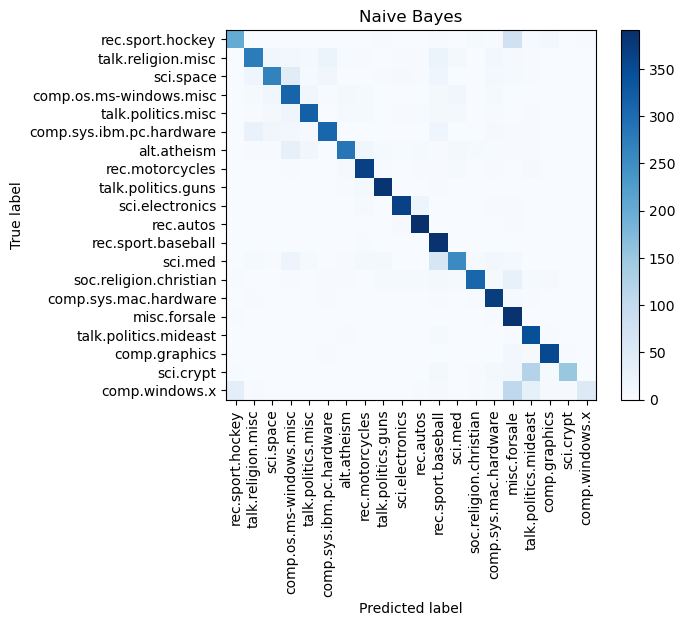

In [15]:
naive_bayes_model = MultinomialNB()
execute_model(naive_bayes_model, "Naive Bayes", X_train, Y_train, X_test, Y_test)

# pickle.dump(clf, open("naive_bayes_model.nlp", 'wb'))

## Decision Tree

Decision Tree Classifier:
Train Accuracy: 0.530316422131872
Test Accuracy: 0.4002920870950611
                          precision    recall  f1-score   support

             alt.atheism       0.71      0.30      0.42       319
           comp.graphics       0.31      0.03      0.05       389
 comp.os.ms-windows.misc       0.56      0.58      0.57       394
comp.sys.ibm.pc.hardware       0.43      0.07      0.12       392
   comp.sys.mac.hardware       0.66      0.37      0.47       385
          comp.windows.x       0.84      0.18      0.30       395
            misc.forsale       0.75      0.52      0.61       390
               rec.autos       0.77      0.55      0.64       396
         rec.motorcycles       0.90      0.67      0.76       398
      rec.sport.baseball       0.75      0.44      0.55       397
        rec.sport.hockey       0.94      0.51      0.66       399
               sci.crypt       0.89      0.64      0.75       396
         sci.electronics       0.09      0.83  

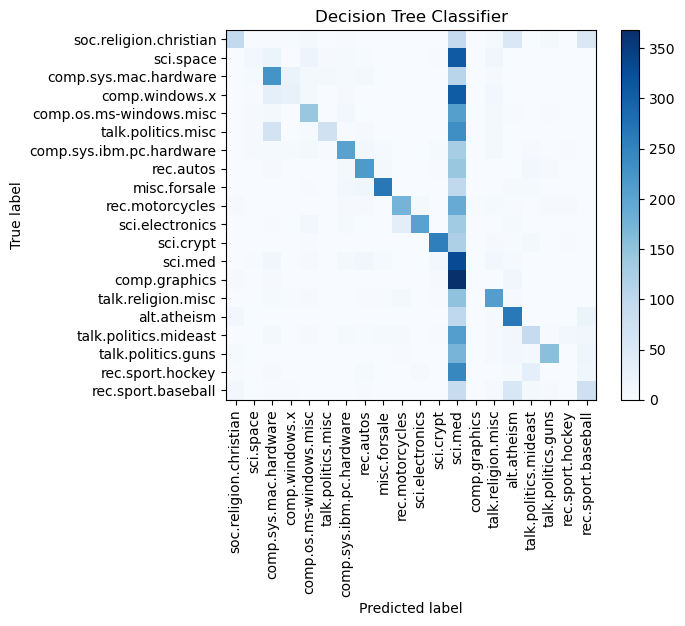

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=20)
execute_model(decision_tree_model, "Decision Tree Classifier", X_train, Y_train, X_test, Y_test)

## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=3)
execute_model(knn_model, "KNN", X_train, Y_train, X_test, Y_test)